# E-Commerce Product Categorization

## Introduction: 
In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data. This project aims to address these challenges through creating innovative solutions that enhance product categorization efficiency, accuracy, and scalability.
We have to develop a text classification model that categorizes products with maximum accuracy based on description of the product.

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import re 
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the train dataset

In [2]:
df=pd.read_csv("train_product_data.csv") 
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,abda697c6da997f66c78d91d6c88078c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air,Mobiles & Accessories,ACCE9ZY9K4BHVYNA,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14995,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
14996,b4fad612a9f72f1ffd10134f9be7cfe8,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air 2,Mobiles & Accessories,ACCE9Z2HKHDGH7JY,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air 2 (...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14997,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


# EDA

In [3]:
df=df[['description','product_category_tree']]  #dropping other redundant columns
df.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [4]:
df.shape

(14999, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            14998 non-null  object
 1   product_category_tree  14999 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [6]:
# Summary Statistics
df.describe()

,description,product_category_tree
count,14998,14999
unique,13163,14
top,Fashion Jewellery Alloy Necklace - Buy Fashion...,Clothing
freq,38,5316


Let's look into duplicate and missing values.

In [7]:
df.duplicated().sum()

1832

In [8]:
df.drop_duplicates(inplace=True) # Dropping the duplicate values

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()/len(df)*100

description              0.007595
product_category_tree    0.000000
dtype: float64

In [11]:
#handling missing value
df['description']=df['description'].fillna(df['description'].mode()[0])  

In [12]:
df.isna().sum()/len(df)*100

description              0.0
product_category_tree    0.0
dtype: float64

In [13]:
df.reset_index(drop = True, inplace = True) 

# Descriptive Analysis

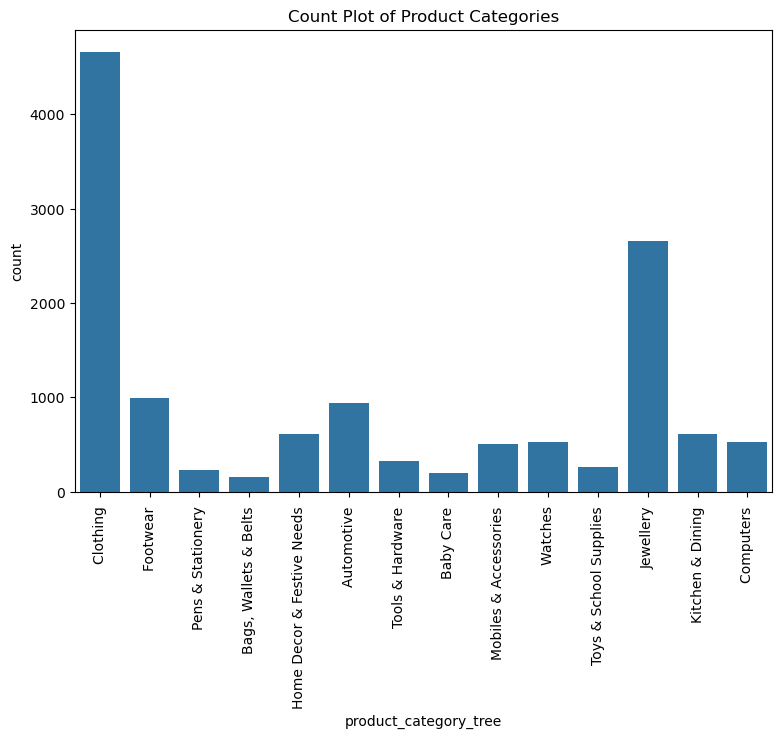

In [14]:
plt.figure(figsize=(9,6))
count_plot = sns.countplot(x='product_category_tree',data=df)
plt.title('Count Plot of Product Categories')
plt.xticks(rotation=90)
plt.show(count_plot)

In [15]:
#encoding the category column
encoder = LabelEncoder()      
df['encoded_category'] = encoder.fit_transform(df['product_category_tree'])  

In [16]:
df

,description,product_category_tree,encoded_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,3
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,5
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,3
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,3
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,5
...,...,...,...
13162,Thelostpuppy Book Cover for Apple iPad Air 2 (...,Mobiles & Accessories,9
13163,Babes Brass Cuff (Pack of 2)\n ...,Jewellery,7
13164,Kenway Retail Brass Copper Cuff\n ...,Jewellery,7
13165,Kenway Retail Brass Copper Cuff\n ...,Jewellery,7


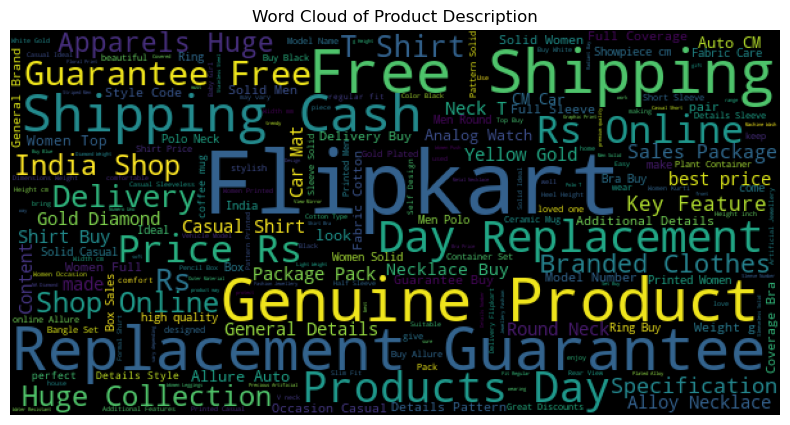

In [17]:
#visualising prominently appearing words in product description
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=600,height=300).generate_from_text(' '.join(df.description))
plt.title('Word Cloud of Product Description')
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

# Feature Engineering

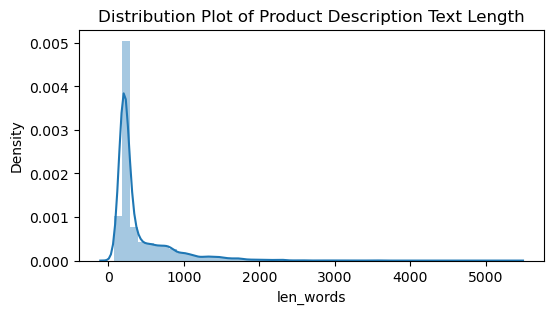

In [18]:
df['len_words'] = df['description'].apply(len)

plt.figure(figsize=(6,3))
dist_plot = sns.distplot(df.len_words)
plt.title('Distribution Plot of Product Description Text Length')
plt.show(dist_plot)

### Text Processing

In [19]:
stopwords=nltk.corpus.stopwords.words('english')
wordnet_lemmatizer=WordNetLemmatizer()

In [20]:
#text processing of description column
def preprocess_text(data,col):
    data[col] = data[col].apply(lambda x:x.lower())
    data[col] = data[col].apply(lambda x: ''.join([c for c in x if not c.isdigit()]))
    data[col] = data[col].apply(lambda x: ' '.join(x.split()))
    data[col] = data[col].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
    data[col] = data[col].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    data[col] = data[col].apply(lambda x: re.sub(r'[^\w\s]', '', x)) 
    data[col] = data[col].apply(lambda x: re.sub(r'<.*?>', '', x))
    data[col] = data[col].apply(lambda x: re.sub(r'\S+@\S+', '', x))
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    return data

In [21]:
preprocessed_data = preprocess_text(df,'description')
preprocessed_data

,description,product_category_tree,encoded_category,len_words
0,key features alisha solid womens cycling short...,Clothing,3,410
1,key features aw bellies sandals wedges heel ca...,Footwear,5,650
2,key features alisha solid womens cycling short...,Clothing,3,403
3,key features alisha solid womens cycling short...,Clothing,3,416
4,key features dilli bazaaar bellies corporate c...,Footwear,5,428
...,...,...,...,...
13162,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories,9,641
13163,babes brass cuff pack price rs babes brand pre...,Jewellery,7,694
13164,kenway retail brass copper cuff price rs sultr...,Jewellery,7,669
13165,kenway retail brass copper cuff price rs hot s...,Jewellery,7,675


#### Lemmatization

In [22]:
def lemmatize_words(text):
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

preprocessed_data['description'] = preprocessed_data['description'].apply(lemmatize_words)

In [23]:
preprocessed_data=preprocessed_data.drop('len_words',axis=1)

In [24]:
#after text processing length of the words 
preprocessed_data['len_words']=preprocessed_data['description'].apply(len) 

In [25]:
preprocessed_data

,description,product_category_tree,encoded_category,len_words
0,key feature alisha solid woman cycling short c...,Clothing,3,344
1,key feature aw belly sandal wedge heel casuals...,Footwear,5,515
2,key feature alisha solid woman cycling short c...,Clothing,3,340
3,key feature alisha solid woman cycling short c...,Clothing,3,350
4,key feature dilli bazaaar belly corporate casu...,Footwear,5,374
...,...,...,...,...
13162,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories,9,427
13163,babe brass cuff pack price r babe brand presen...,Jewellery,7,456
13164,kenway retail brass copper cuff price r sultry...,Jewellery,7,513
13165,kenway retail brass copper cuff price r hot sw...,Jewellery,7,497


In [26]:
#storing feature and target columns
X= preprocessed_data.description
y= preprocessed_data.encoded_category

### Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10533,)
X_test shape: (2634,)
y_train shape: (10533,)
y_test shape: (2634,)


### Vectorization of text data

In [28]:
vect = TfidfVectorizer()
X_train_vect= vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)


### Handling class imbalance 


In [29]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vect, y_train)


In [30]:
X,y=X_resampled,y_resampled

In [31]:
y_resampled.value_counts()

encoded_category
0     3736
6     3736
8     3736
10    3736
3     3736
13    3736
7     3736
1     3736
12    3736
9     3736
5     3736
4     3736
11    3736
2     3736
Name: count, dtype: int64

# MultiClass Text Classifier Models(ML approach)

## 1)Logistic Regression

In [32]:
lr = LogisticRegression(class_weight='balanced').fit(X_train_vect,y_train)   
lr_pred=lr.predict(X_test_vect) 


In [33]:
lr_accuracy =accuracy_score(y_test,lr_pred) 
print("*****************************Logistic Regression***********************:")
print("Accuracy: ",lr_accuracy)
print("Classification_report:\n",classification_report(y_test, lr_pred)) 

print("f1: ",f1_score(y_test,lr_pred,average='weighted')) 
print("precision: ",precision_score(y_test,lr_pred,average='weighted'))
print("recall: ",recall_score(y_test,lr_pred,average='weighted')) 


*****************************Logistic Regression***********************:
Accuracy:  0.9787395596051632
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.78      0.79      0.78        39
           2       0.87      1.00      0.93        33
           3       1.00      0.99      0.99       928
           4       0.93      0.97      0.95        95
           5       0.99      0.99      0.99       189
           6       0.98      0.98      0.98       131
           7       1.00      1.00      1.00       560
           8       0.95      0.99      0.97       120
           9       0.97      0.95      0.96       116
          10       0.87      0.77      0.82        44
          11       1.00      0.97      0.98        60
          12       0.81      0.83      0.82        41
          13       1.00      1.00      1.00        92

    accuracy                           0.98      2634
   macr

In [34]:
print("Confusion_matrix:\n",confusion_matrix(y_test,lr_pred,labels=lr.classes_)) 


Confusion_matrix:
 [[185   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0  31   2   2   0   0   1   0   1   0   1   0   1   0]
 [  0   0  33   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7   0 916   0   1   0   2   2   0   0   0   0   0]
 [  0   0   0   0  92   0   0   0   0   3   0   0   0   0]
 [  0   0   0   2   0 187   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0 128   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0 559   0   0   1   0   0   0]
 [  0   1   0   0   0   0   0   0 119   0   0   0   0   0]
 [  1   0   0   0   5   0   0   0   0 110   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0  34   0   7   0]
 [  0   0   0   0   0   0   2   0   0   0   0  58   0   0]
 [  2   0   2   0   0   0   0   0   0   0   3   0  34   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92]]


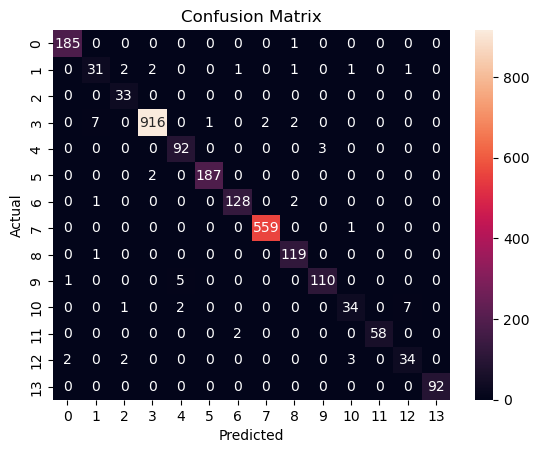

In [35]:
cnf_matrix_lr= confusion_matrix(y_test,lr_pred) 
sns.heatmap(cnf_matrix_lr,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [36]:
#Hyperparameter tuning of the model
param_grid_lr={
    'C':[0.01,0.1,1,10,100],
    'solver': ['liblinear', 'saga']
} 

grid_search_lr=GridSearchCV(lr,param_grid_lr,cv=5,scoring='accuracy') 
grid_search_lr.fit(X_train_vect, y_train) 

best_lr=grid_search_lr.best_estimator_

In [37]:
best_lr

LogisticRegression(C=100, class_weight='balanced', solver='liblinear')

In [38]:
best_lr.fit(X_train_vect,y_train) 
best_lr_pred= best_lr.predict(X_test_vect) 

In [39]:
bestlr_accuracy =accuracy_score(y_test,best_lr_pred)
print("***************************** Best Logistic Regression***********************:")
print("Accuracy: ",bestlr_accuracy)
print("Classification_report:\n",classification_report(y_test, best_lr_pred)) 

print("f1: ",f1_score(y_test,best_lr_pred,average='weighted')) 
print("precision: ",precision_score(y_test,best_lr_pred,average='weighted'))
print("recall: ",recall_score(y_test,best_lr_pred,average='weighted'))

***************************** Best Logistic Regression***********************:
Accuracy:  0.9821564160971906
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.86      0.82      0.84        39
           2       0.94      1.00      0.97        33
           3       0.99      0.99      0.99       928
           4       0.96      0.99      0.97        95
           5       0.99      0.99      0.99       189
           6       0.98      0.98      0.98       131
           7       0.99      1.00      1.00       560
           8       0.96      0.99      0.98       120
           9       0.99      0.97      0.98       116
          10       0.82      0.75      0.79        44
          11       1.00      0.97      0.98        60
          12       0.81      0.83      0.82        41
          13       1.00      1.00      1.00        92

    accuracy                           0.98      2634
 

In [40]:
print("Confusion_matrix:\n",confusion_matrix(y_test,best_lr_pred,labels=best_lr.classes_)) 


Confusion_matrix:
 [[184   0   0   0   0   0   0   0   1   0   1   0   0   0]
 [  0  32   0   2   0   0   1   0   1   0   2   0   1   0]
 [  0   0  33   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0 921   0   1   0   2   0   0   0   0   0   0]
 [  0   0   0   0  94   0   0   0   0   1   0   0   0   0]
 [  0   0   0   2   0 187   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0 128   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0 560   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0 119   0   0   0   0   0]
 [  1   0   0   0   3   0   0   0   0 112   0   0   0   0]
 [  0   0   1   0   1   0   0   1   1   0  33   0   7   0]
 [  0   0   0   0   0   0   2   0   0   0   0  58   0   0]
 [  2   0   1   0   0   0   0   0   0   0   4   0  34   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92]]


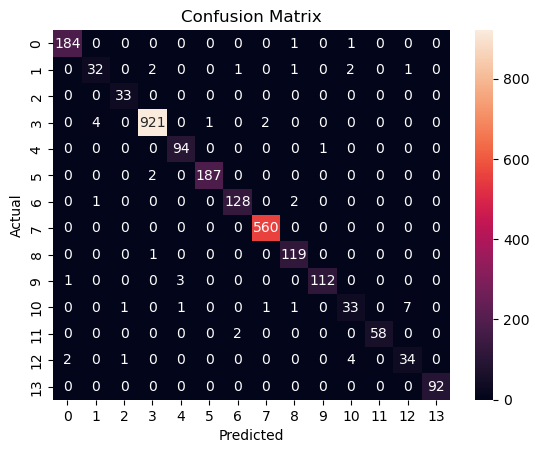

In [41]:
cnf_matrix_bestlr= confusion_matrix(y_test,best_lr_pred) 
sns.heatmap(cnf_matrix_bestlr,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## 2)Support Vector Machine

In [42]:
svm = LinearSVC(random_state=42)
svm.fit(X_train_vect,y_train)
svm_pred=svm.predict(X_test_vect)


In [43]:
svm_accuracy =accuracy_score(y_test,svm_pred)
print("***************************** Support Vector Machine***********************:")
print("Accuracy: ",svm_accuracy) 
print("Classification_report:\n",classification_report(y_test, svm_pred))

print("f1: ",f1_score(y_test,svm_pred,average='weighted')) 
print("precision: ",precision_score(y_test,svm_pred,average='weighted'))
print("recall: ",recall_score(y_test,svm_pred,average='weighted')) 


***************************** Support Vector Machine***********************:
Accuracy:  0.9821564160971906
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.89      0.79      0.84        39
           2       0.91      0.97      0.94        33
           3       0.99      0.99      0.99       928
           4       0.96      0.98      0.97        95
           5       0.99      0.99      0.99       189
           6       0.98      0.98      0.98       131
           7       0.99      1.00      1.00       560
           8       0.97      0.99      0.98       120
           9       0.98      0.97      0.97       116
          10       0.91      0.73      0.81        44
          11       1.00      0.97      0.98        60
          12       0.80      0.88      0.84        41
          13       1.00      1.00      1.00        92

    accuracy                           0.98      2634
   

In [44]:
print("Confusion_matrix:\n",confusion_matrix(y_test,svm_pred,labels=svm.classes_)) 


Confusion_matrix:
 [[185   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0  31   1   4   0   0   1   0   0   0   1   0   1   0]
 [  0   0  32   1   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0 922   0   1   0   2   0   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   0   2   0   0   0   0]
 [  0   0   0   2   0 187   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0 128   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0 560   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0 119   0   0   0   0   0]
 [  1   0   0   0   3   0   0   0   0 112   0   0   0   0]
 [  0   0   1   0   1   0   0   1   1   0  32   0   8   0]
 [  0   0   0   0   0   0   2   0   0   0   0  58   0   0]
 [  2   0   1   0   0   0   0   0   0   0   2   0  36   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92]]


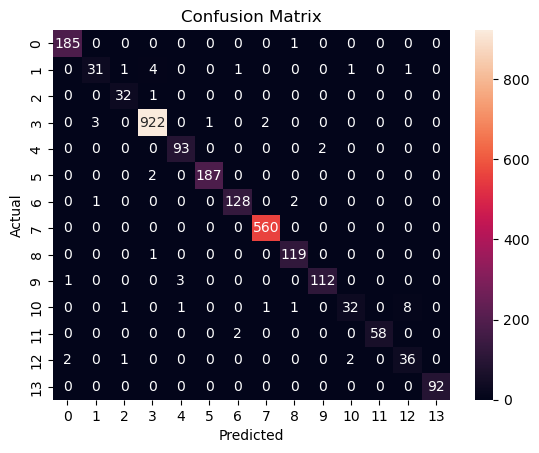

In [45]:
cnf_matrix_svm= confusion_matrix(y_test,svm_pred) 
sns.heatmap(cnf_matrix_svm,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [46]:
# Hyperparameter tuning
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'max_iter': [1000, 2000],  
    'loss': ['hinge', 'squared_hinge'],  
    'dual': [False]  
}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train_vect, y_train)
best_svm = grid_search_svm.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [47]:
best_svm.fit(X_train_vect,y_train) 
best_svm_pred= best_svm.predict(X_test_vect) 

In [48]:
bestsvm_accuracy =accuracy_score(y_test,best_svm_pred)
print("*****************************Best Support Vector Machine***********************:")
print("Accuracy: ",bestsvm_accuracy) 
print("Classification_report:\n",classification_report(y_test, best_svm_pred))

print("f1: ",f1_score(y_test,best_svm_pred,average='weighted')) 
print("precision: ",precision_score(y_test,best_svm_pred,average='weighted'))
print("recall: ",recall_score(y_test,best_svm_pred,average='weighted')) 


*****************************Best Support Vector Machine***********************:
Accuracy:  0.9821564160971906
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.89      0.79      0.84        39
           2       0.91      0.97      0.94        33
           3       0.99      0.99      0.99       928
           4       0.96      0.98      0.97        95
           5       0.99      0.99      0.99       189
           6       0.98      0.98      0.98       131
           7       0.99      1.00      1.00       560
           8       0.97      0.99      0.98       120
           9       0.98      0.97      0.97       116
          10       0.91      0.73      0.81        44
          11       1.00      0.97      0.98        60
          12       0.80      0.88      0.84        41
          13       1.00      1.00      1.00        92

    accuracy                           0.98      2634

In [49]:
print("Confusion_matrix:\n",confusion_matrix(y_test,best_svm_pred,labels=best_svm.classes_)) 


Confusion_matrix:
 [[185   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0  31   1   4   0   0   1   0   0   0   1   0   1   0]
 [  0   0  32   1   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0 922   0   1   0   2   0   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   0   2   0   0   0   0]
 [  0   0   0   2   0 187   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0 128   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0 560   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0 119   0   0   0   0   0]
 [  1   0   0   0   3   0   0   0   0 112   0   0   0   0]
 [  0   0   1   0   1   0   0   1   1   0  32   0   8   0]
 [  0   0   0   0   0   0   2   0   0   0   0  58   0   0]
 [  2   0   1   0   0   0   0   0   0   0   2   0  36   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92]]


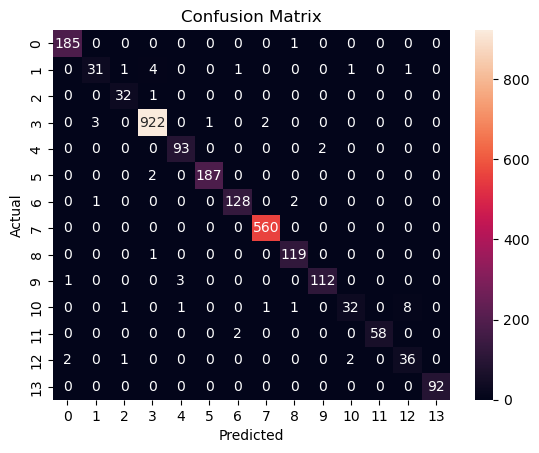

In [50]:
cnf_matrix_bestsvm= confusion_matrix(y_test,best_svm_pred) 
sns.heatmap(cnf_matrix_bestsvm,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## 3) Multinomial Naive Bayes Classifier

In [51]:
multi_nb =  MultinomialNB(alpha=0.01)
multi_nb.fit(X_train_vect,y_train)
nb_pred = multi_nb.predict(X_test_vect)


In [52]:
nb_accuracy =accuracy_score(y_test,nb_pred)
print("***************************** Naive Bayes Classifier***********************:")
print("Accuracy: ",nb_accuracy) 
print("Classification_report:\n",classification_report(y_test, nb_pred))

print("f1: ",f1_score(y_test,nb_pred,average='weighted')) 
print("precision: ",precision_score(y_test,nb_pred,average='weighted'))
print("recall: ",recall_score(y_test,nb_pred,average='weighted')) 


***************************** Naive Bayes Classifier***********************:
Accuracy:  0.9745634016704632
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.90      0.72      0.80        39
           2       0.86      0.73      0.79        33
           3       0.99      0.99      0.99       928
           4       0.95      0.97      0.96        95
           5       0.99      0.98      0.99       189
           6       0.94      0.98      0.96       131
           7       0.99      1.00      0.99       560
           8       0.98      0.99      0.99       120
           9       0.96      0.96      0.96       116
          10       0.90      0.64      0.75        44
          11       1.00      0.95      0.97        60
          12       0.72      0.88      0.79        41
          13       1.00      0.99      0.99        92

    accuracy                           0.97      2634
   

In [53]:
print("Confusion_matrix:\n",confusion_matrix(y_test,nb_pred,labels=multi_nb.classes_)) 


Confusion_matrix:
 [[185   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  1  28   1   6   0   0   1   0   1   0   1   0   0   0]
 [  0   0  24   3   0   0   0   2   0   0   0   0   4   0]
 [  0   3   0 923   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0  92   0   0   0   0   3   0   0   0   0]
 [  0   0   0   1   0 186   1   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0 129   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   2 558   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0 111   0   0   1   0]
 [  0   0   1   1   1   1   1   2   0   0  28   0   9   0]
 [  0   0   0   0   0   0   3   0   0   0   0  57   0   0]
 [  1   0   2   0   0   0   0   0   0   0   2   0  36   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0  91]]


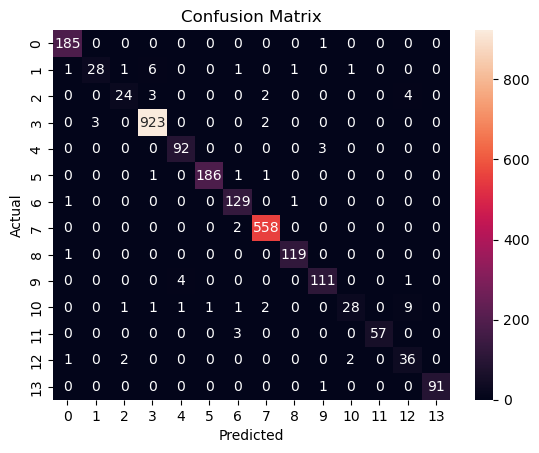

In [54]:
cnf_matrix_nb= confusion_matrix(y_test,nb_pred) 
sns.heatmap(cnf_matrix_nb,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [55]:
# Hyperparameter tuning of the model
param_grid_nb = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5, 10]  
} 

grid_search_nb = GridSearchCV(estimator=multi_nb, 
                           param_grid=param_grid_nb, 
                           scoring='accuracy', 
                           cv=5,        
                           verbose=1) 
grid_search_nb.fit(X_train_vect, y_train) 

best_nb=grid_search_nb.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [56]:
best_nb.fit(X_train_vect,y_train) 
best_nb_pred= best_nb.predict(X_test_vect) 

In [57]:
bestnb_accuracy =accuracy_score(y_test,best_nb_pred)
print("***************************** Best Naive Bayes ***********************:")
print("Accuracy: ",bestnb_accuracy)
print("Classification_report:\n",classification_report(y_test, best_nb_pred)) 

print("f1: ",f1_score(y_test,best_nb_pred,average='weighted')) 
print("precision: ",precision_score(y_test,best_nb_pred,average='weighted'))
print("recall: ",recall_score(y_test,best_nb_pred,average='weighted'))

***************************** Best Naive Bayes ***********************:
Accuracy:  0.9745634016704632
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.90      0.72      0.80        39
           2       0.86      0.73      0.79        33
           3       0.99      0.99      0.99       928
           4       0.95      0.97      0.96        95
           5       0.99      0.98      0.99       189
           6       0.94      0.98      0.96       131
           7       0.99      1.00      0.99       560
           8       0.98      0.99      0.99       120
           9       0.96      0.96      0.96       116
          10       0.90      0.64      0.75        44
          11       1.00      0.95      0.97        60
          12       0.72      0.88      0.79        41
          13       1.00      0.99      0.99        92

    accuracy                           0.97      2634
   macro

In [58]:
print("Confusion_matrix:\n",confusion_matrix(y_test,best_nb_pred,labels=best_nb.classes_)) 


Confusion_matrix:
 [[185   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  1  28   1   6   0   0   1   0   1   0   1   0   0   0]
 [  0   0  24   3   0   0   0   2   0   0   0   0   4   0]
 [  0   3   0 923   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0  92   0   0   0   0   3   0   0   0   0]
 [  0   0   0   1   0 186   1   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0 129   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   2 558   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0 111   0   0   1   0]
 [  0   0   1   1   1   1   1   2   0   0  28   0   9   0]
 [  0   0   0   0   0   0   3   0   0   0   0  57   0   0]
 [  1   0   2   0   0   0   0   0   0   0   2   0  36   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0  91]]


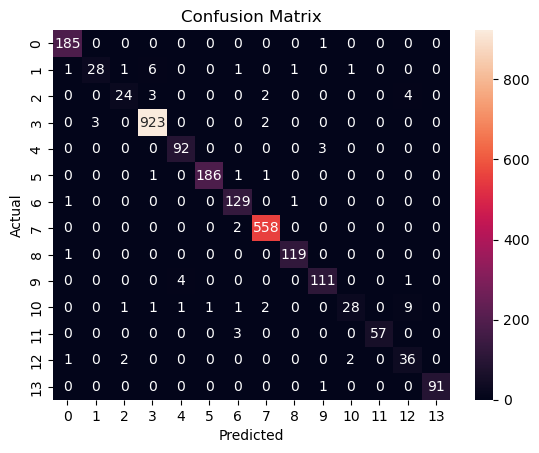

In [59]:
cnf_matrix_bestnb= confusion_matrix(y_test,best_nb_pred) 
sns.heatmap(cnf_matrix_bestnb,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## 4)Random Forest Classifier

In [60]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_vect, y_train)
rf_pred = random_forest.predict(X_test_vect)


In [61]:
rf_accuracy =accuracy_score(y_test,rf_pred)
print("***************************** Random Forest Classifier***********************:")
print("Accuracy: ",rf_accuracy) 
print("Classification_report:\n",classification_report(y_test, rf_pred))

print("f1: ",f1_score(y_test,rf_pred,average='weighted')) 
print("precision: ",precision_score(y_test,rf_pred,average='weighted'))
print("recall: ",recall_score(y_test,rf_pred,average='weighted')) 


***************************** Random Forest Classifier***********************:
Accuracy:  0.9646924829157175
Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       186
           1       0.90      0.49      0.63        39
           2       0.96      0.76      0.85        33
           3       0.97      1.00      0.98       928
           4       0.89      0.95      0.92        95
           5       0.98      0.97      0.98       189
           6       0.96      0.96      0.96       131
           7       1.00      0.99      0.99       560
           8       0.91      0.98      0.94       120
           9       0.96      0.94      0.95       116
          10       0.84      0.59      0.69        44
          11       1.00      0.95      0.97        60
          12       0.79      0.80      0.80        41
          13       1.00      0.99      0.99        92

    accuracy                           0.96      2634
 

In [62]:
print("Confusion_matrix:\n",confusion_matrix(y_test,rf_pred,labels=random_forest.classes_)) 


Confusion_matrix:
 [[183   0   0   1   0   0   0   0   2   0   0   0   0   0]
 [  1  19   0  15   0   0   1   0   2   0   0   0   1   0]
 [  0   0  25   5   1   2   0   0   0   0   0   0   0   0]
 [  0   0   0 925   0   0   0   2   1   0   0   0   0   0]
 [  0   0   0   1  90   0   0   0   1   3   0   0   0   0]
 [  0   0   0   3   2 184   0   0   0   0   0   0   0   0]
 [  1   0   0   2   0   0 126   0   2   0   0   0   0   0]
 [  0   0   0   1   4   0   0 555   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0 118   0   0   0   0   0]
 [  1   0   0   1   4   1   0   0   0 109   0   0   0   0]
 [  1   2   1   1   0   1   0   0   3   1  26   0   8   0]
 [  1   0   0   0   0   0   1   0   1   0   0  57   0   0]
 [  1   0   0   2   0   0   0   0   0   0   5   0  33   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0  91]]


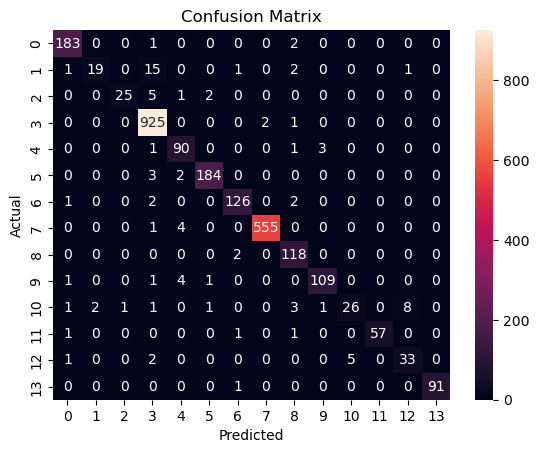

In [63]:
cnf_matrix_rf= confusion_matrix(y_test,rf_pred) 
sns.heatmap(cnf_matrix_rf,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [64]:
#hyperparameter tuning
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf=RandomizedSearchCV(random_forest,param_distributions=param_dist_rf,cv=3,verbose=2,
scoring='accuracy') 
random_search_rf.fit(X_train_vect, y_train) 

best_rf=random_search_rf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, m

In [65]:
best_rf

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [66]:
best_rf.fit(X_train_vect,y_train) 
best_rf_pred= best_rf.predict(X_test_vect) 

In [67]:
bestrf_accuracy =accuracy_score(y_test,best_rf_pred)
print("***************************** Best Random Forest Classifier***********************:")
print("Accuracy: ",bestrf_accuracy)
print("Classification_report:\n",classification_report(y_test, best_rf_pred)) 

print("f1: ",f1_score(y_test,best_rf_pred,average='weighted')) 
print("precision: ",precision_score(y_test,best_rf_pred,average='weighted'))
print("recall: ",recall_score(y_test,best_rf_pred,average='weighted'))

***************************** Best Random Forest Classifier***********************:
Accuracy:  0.9248291571753986
Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       186
           1       1.00      0.31      0.47        39
           2       0.88      0.42      0.57        33
           3       0.92      1.00      0.96       928
           4       0.91      0.92      0.91        95
           5       0.95      0.67      0.78       189
           6       0.94      0.97      0.95       131
           7       0.89      0.99      0.94       560
           8       0.97      0.90      0.94       120
           9       0.98      0.87      0.92       116
          10       1.00      0.45      0.62        44
          11       1.00      0.95      0.97        60
          12       0.76      0.76      0.76        41
          13       1.00      0.97      0.98        92

    accuracy                           0.92      2

In [68]:
print("Confusion_matrix:\n",confusion_matrix(y_test,best_rf_pred,labels=best_rf.classes_)) 


Confusion_matrix:
 [[184   0   0   1   0   0   1   0   0   0   0   0   0   0]
 [  0  12   0  21   0   0   2   4   0   0   0   0   0   0]
 [  0   0  14   7   4   4   0   4   0   0   0   0   0   0]
 [  0   0   0 924   0   0   1   3   0   0   0   0   0   0]
 [  0   0   0   2  87   1   0   3   0   2   0   0   0   0]
 [  0   0   0  20   0 126   0  43   0   0   0   0   0   0]
 [  0   0   0   2   0   0 127   0   2   0   0   0   0   0]
 [  0   0   0   4   0   0   0 556   0   0   0   0   0   0]
 [  0   0   0   8   2   0   1   1 108   0   0   0   0   0]
 [  0   0   0   5   3   1   0   6   0 101   0   0   0   0]
 [  2   0   1   6   0   1   1   2   1   0  20   0  10   0]
 [  0   0   0   0   0   0   2   1   0   0   0  57   0   0]
 [  3   0   0   5   0   0   0   2   0   0   0   0  31   0]
 [  0   0   1   2   0   0   0   0   0   0   0   0   0  89]]


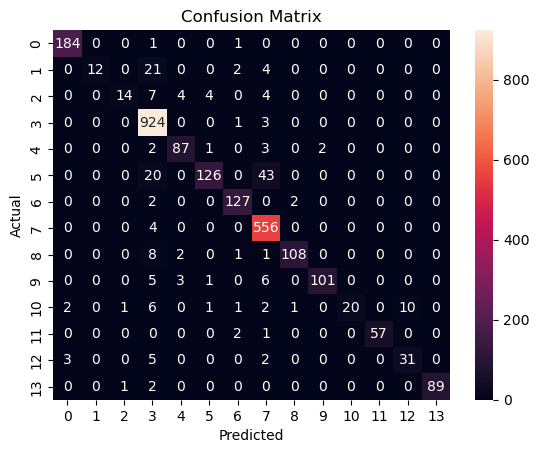

In [69]:
cnf_matrix_bestrf= confusion_matrix(y_test,best_rf_pred) 
sns.heatmap(cnf_matrix_bestrf,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## 5)XGBoost Classifier

In [70]:
xgb = XGBClassifier()
xgb.fit(X_train_vect, y_train)
xgb_pred = xgb.predict(X_test_vect)


In [71]:
xgb_accuracy =accuracy_score(y_test,xgb_pred)
print("*****************************XGBoost Classifier***********************:")
print("Accuracy: ",xgb_accuracy) 
print("Classification_report:\n",classification_report(y_test, xgb_pred))

print("f1: ",f1_score(y_test,xgb_pred,average='weighted')) 
print("precision: ",precision_score(y_test,xgb_pred,average='weighted'))
print("recall: ",recall_score(y_test,xgb_pred,average='weighted')) 


*****************************XGBoost Classifier***********************:
Accuracy:  0.975322703113136
Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       186
           1       0.80      0.82      0.81        39
           2       0.94      0.97      0.96        33
           3       0.99      0.99      0.99       928
           4       0.92      0.98      0.95        95
           5       0.99      0.99      0.99       189
           6       0.98      0.98      0.98       131
           7       0.99      1.00      1.00       560
           8       0.92      0.98      0.95       120
           9       0.95      0.91      0.93       116
          10       0.83      0.68      0.75        44
          11       1.00      0.97      0.98        60
          12       0.81      0.83      0.82        41
          13       1.00      1.00      1.00        92

    accuracy                           0.98      2634
   macro 

In [72]:
print("Confusion_matrix:\n",confusion_matrix(y_test,xgb_pred,labels=xgb.classes_)) 


Confusion_matrix:
 [[183   0   0   0   0   0   0   0   1   2   0   0   0   0]
 [  0  32   1   2   0   0   1   0   1   0   0   0   2   0]
 [  0   0  32   1   0   0   0   0   0   0   0   0   0   0]
 [  0   6   0 918   0   0   1   2   1   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   1   1   0   0   0   0]
 [  0   0   0   1   0 188   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128   0   2   0   1   0   0   0]
 [  0   0   1   0   0   1   0 558   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 118   0   1   0   0   0]
 [  1   0   0   1   8   1   0   0   0 105   0   0   0   0]
 [  1   2   0   0   0   0   0   0   3   2  30   0   6   0]
 [  1   0   0   0   0   0   1   0   0   0   0  58   0   0]
 [  2   0   0   0   0   0   0   0   1   0   4   0  34   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92]]


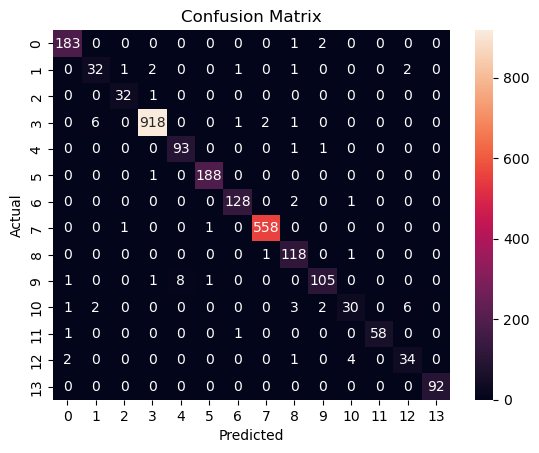

In [73]:
cnf_matrix_xgb= confusion_matrix(y_test,xgb_pred) 
sns.heatmap(cnf_matrix_xgb,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

# Loading test dataset

In [74]:
upgrad_test_data=pd.read_csv("test_data.csv") 
upgrad_test_data

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
2530,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
2531,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
2532,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [75]:
upgrad_test_data=upgrad_test_data[['description']] # Dropping redundant columns

In [76]:
upgrad_test_data

,description
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...
1,Kalpaveda Copper Copper Cuff\n ...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...
3,Riana Copper Copper Bangle - Buy Riana Copper ...
4,Inox Jewelry Stainless Steel Cuff\n ...
...,...
2529,Buy WallDesign Small Vinyl Sticker for Rs.730 ...
2530,Buy Wallmantra Large Vinyl Stickers Sticker fo...
2531,Buy Elite Collection Medium Acrylic Sticker fo...
2532,Buy Elite Collection Medium Acrylic Sticker fo...


## EDA

In [77]:
upgrad_test_data.shape

(2534, 1)

In [78]:
upgrad_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  2534 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [79]:
# Checking the missing values
upgrad_test_data.isnull().sum() 

description    0
dtype: int64

## Feature Engineering

In [80]:
upgrad_test_data['length_words'] = upgrad_test_data['description'].apply(len)


In [81]:
upgrad_test_data

,description,length_words
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,173
1,Kalpaveda Copper Copper Cuff\n ...,1498
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,639
3,Riana Copper Copper Bangle - Buy Riana Copper ...,181
4,Inox Jewelry Stainless Steel Cuff\n ...,3201
...,...,...
2529,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,191
2530,Buy Wallmantra Large Vinyl Stickers Sticker fo...,210
2531,Buy Elite Collection Medium Acrylic Sticker fo...,209
2532,Buy Elite Collection Medium Acrylic Sticker fo...,210


### Text Processing

In [82]:
preprocessed_test_data = preprocess_text(upgrad_test_data,'description')
preprocessed_test_data

,description,length_words
0,vv art brass bracelet buy vv art brass bracele...,173
1,kalpaveda copper copper cuff price rs attract ...,1498
2,thelostpuppy book cover apple ipad air multico...,639
3,riana copper copper bangle buy riana copper co...,181
4,inox jewelry stainless steel cuff price rs ino...,3201
...,...,...
2529,buy walldesign small vinyl sticker rs online w...,191
2530,buy wallmantra large vinyl stickers sticker rs...,210
2531,buy elite collection medium acrylic sticker rs...,209
2532,buy elite collection medium acrylic sticker rs...,210


In [83]:
def lemmatize_words(text):
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

preprocessed_test_data['description'] = preprocessed_test_data['description'].apply(lemmatize_words)

In [84]:
preprocessed_test_data=preprocessed_test_data.drop('length_words',axis=1)

In [85]:
# After text processing length of words
preprocessed_test_data['length_words']=preprocessed_test_data['description'].apply(len)

In [86]:
preprocessed_test_data

,description,length_words
0,vv art brass bracelet buy vv art brass bracele...,131
1,kalpaveda copper copper cuff price r attract e...,1032
2,thelostpuppy book cover apple ipad air multico...,427
3,riana copper copper bangle buy riana copper co...,141
4,inox jewelry stainless steel cuff price r inox...,2225
...,...,...
2529,buy walldesign small vinyl sticker r online wa...,155
2530,buy wallmantra large vinyl sticker sticker r o...,171
2531,buy elite collection medium acrylic sticker r ...,173
2532,buy elite collection medium acrylic sticker r ...,173


In [87]:
# Storing feature
x_data= preprocessed_test_data.description

### Vectorization of text data

In [88]:
x_test_vect_td= vect.transform(x_data) 

In [89]:
x_test_vect_td

<2534x15239 sparse matrix of type '<class 'numpy.float64'>'
	with 82893 stored elements in Compressed Sparse Row format>

## Loading test_results dataset

In [90]:
test_results=pd.read_csv("test_results.csv") 
test_results

,product_category_tree
0,Jewellery
1,Jewellery
2,Mobiles & Accessories
3,Jewellery
4,Jewellery
...,...
2529,Baby Care
2530,Baby Care
2531,Baby Care
2532,Baby Care


### Category Encoding

In [91]:
encoder = LabelEncoder()
test_results['encoded_category'] = encoder.fit_transform(test_results['product_category_tree'])

In [92]:
test_results

,product_category_tree,encoded_category
0,Jewellery,7
1,Jewellery,7
2,Mobiles & Accessories,9
3,Jewellery,7
4,Jewellery,7
...,...,...
2529,Baby Care,1
2530,Baby Care,1
2531,Baby Care,1
2532,Baby Care,1


In [93]:
# Using only encoded_category column
test_results=test_results[['encoded_category']]

In [94]:
test_results

,encoded_category
0,7
1,7
2,9
3,7
4,7
...,...
2529,1
2530,1
2531,1
2532,1


# Evaluation of the test data using the ML models

Let's predict test data using **Best Logistic Regression model**

In [95]:
test_lr_pred= best_lr.predict(x_test_vect_td) 

In [96]:
test_lr_accuracy =(accuracy_score(test_results,test_lr_pred))*100  # transforming accuracy into percentage of accuracy
print("*****************************Best Logistic Regression***********************:")
print("Accuracy: ",test_lr_accuracy)
print("Classification_report:\n",classification_report(test_results,test_lr_pred )) 

print("f1: ",f1_score(test_results,test_lr_pred,average='weighted')) 
print("precision: ",precision_score(test_results,test_lr_pred,average='weighted'))
print("recall: ",recall_score(test_results,test_lr_pred,average='weighted'))

*****************************Best Logistic Regression***********************:
Accuracy:  84.64877663772693
Classification_report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78        75
           1       0.69      0.08      0.14       259
           2       1.00      0.87      0.93       107
           3       0.92      0.99      0.95       882
           4       0.94      0.98      0.96        47
           5       0.99      0.99      0.99       144
           6       0.47      0.82      0.59       215
           7       0.97      0.96      0.96       313
           8       0.60      0.95      0.74        37
           9       0.98      0.92      0.95       331
          10       0.67      0.80      0.73        49
          11       0.50      0.08      0.14        12
          12       0.91      0.69      0.79        59
          13       0.75      0.75      0.75         4

    accuracy                           0.85      2534
   

In [97]:
print("Confusion_matrix:\n",confusion_matrix(test_results,test_lr_pred,labels=best_lr.classes_)) 


Confusion_matrix:
 [[ 70   0   0   2   2   0   0   0   0   1   0   0   0   0]
 [  0  20   0  41   0   0 195   1   1   0   1   0   0   0]
 [  0   0  93   0   0   1   0   1   7   3   2   0   0   0]
 [  0   8   0 873   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0  46   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0 143   0   0   0   0   0   0   0   0]
 [  0   1   0  22   1   0 176   8   4   0   2   1   0   0]
 [  0   0   0  12   0   0   0 300   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35   1   1   0   0   0]
 [ 26   0   0   0   0   0   0   0   0 305   0   0   0   0]
 [  0   0   0   0   0   0   3   0   4   0  39   0   3   0]
 [  8   0   0   0   0   0   2   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   5   0  13   0  41   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   3]]


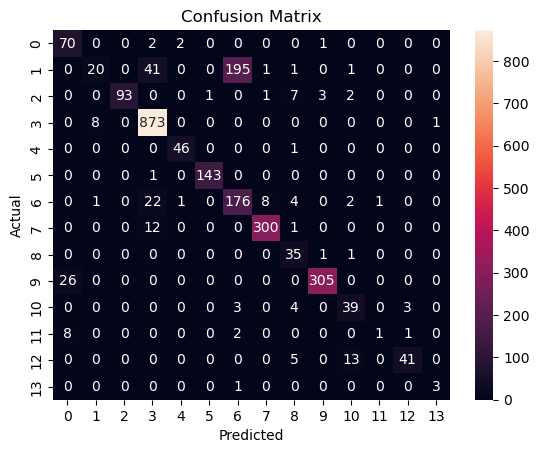

In [98]:
cnf_matrix_test_lr= confusion_matrix(test_results,test_lr_pred) 
sns.heatmap(cnf_matrix_test_lr,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

Let's predict test data using **Support Vector Machine**

In [99]:
test_svm_pred= svm.predict(x_test_vect_td) 

In [100]:
test_svm_accuracy =(accuracy_score(test_results,test_svm_pred))*100
print("*****************************Support Vector Machine***********************:")
print("Accuracy: ",test_svm_accuracy)
print("Classification_report:\n",classification_report(test_results,test_svm_pred)) 

print("f1: ",f1_score(test_results,test_svm_pred,average='weighted')) 
print("precision: ",precision_score(test_results,test_svm_pred,average='weighted'))
print("recall: ",recall_score(test_results,test_svm_pred,average='weighted'))

*****************************Support Vector Machine***********************:
Accuracy:  84.96448303078137
Classification_report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78        75
           1       0.68      0.07      0.13       259
           2       1.00      0.87      0.93       107
           3       0.92      0.99      0.95       882
           4       0.94      0.98      0.96        47
           5       0.98      0.99      0.99       144
           6       0.47      0.82      0.59       215
           7       0.96      0.96      0.96       313
           8       0.60      0.95      0.74        37
           9       0.98      0.92      0.95       331
          10       0.86      0.78      0.82        49
          11       0.33      0.08      0.13        12
          12       0.96      0.86      0.91        59
          13       0.75      0.75      0.75         4

    accuracy                           0.85      2534
   ma

In [101]:
print("Confusion_matrix:\n",confusion_matrix(test_results,test_svm_pred,labels=svm.classes_)) 


Confusion_matrix:
 [[ 70   0   0   2   2   0   0   0   0   1   0   0   0   0]
 [  0  19   0  42   0   0 195   1   1   0   1   0   0   0]
 [  0   0  93   0   0   3   0   1   7   3   0   0   0   0]
 [  0   8   0 873   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0  46   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0 143   0   0   0   0   0   0   0   0]
 [  0   1   0  22   1   0 176   9   4   0   1   1   0   0]
 [  0   0   0  12   0   0   0 300   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35   1   1   0   0   0]
 [ 26   0   0   0   0   0   0   0   0 305   0   0   0   0]
 [  0   0   0   0   0   0   3   1   5   0  38   1   1   0]
 [  8   0   0   0   0   0   2   0   0   0   0   1   1   0]
 [  0   0   0   1   0   0   0   0   4   0   3   0  51   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   3]]


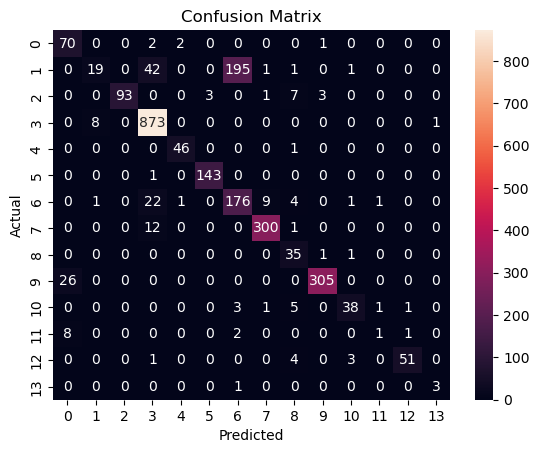

In [102]:
cnf_matrix_test_svm= confusion_matrix(test_results,test_svm_pred) 
sns.heatmap(cnf_matrix_test_svm,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

Let's predict test data using **Multinomial Naive Bayes Classifier**

In [103]:
test_nb_pred= multi_nb.predict(x_test_vect_td) 

In [104]:
test_nb_accuracy =(accuracy_score(test_results,test_nb_pred))*100
print("***************************** Multinomial Naive Bayes ***********************:")
print("Accuracy: ",test_nb_accuracy)
print("Classification_report:\n",classification_report(test_results,test_nb_pred)) 

print("f1: ",f1_score(test_results,test_nb_pred,average='weighted')) 
print("presion: ",precision_score(test_results,test_nb_pred,average='weighted'))
print("recall: ",recall_score(test_results,test_nb_pred,average='weighted'))

***************************** Multinomial Naive Bayes ***********************:
Accuracy:  84.76716653512234
Classification_report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        75
           1       0.71      0.08      0.15       259
           2       0.97      0.83      0.89       107
           3       0.94      0.99      0.96       882
           4       0.62      0.32      0.42        47
           5       0.99      0.99      0.99       144
           6       0.47      0.94      0.63       215
           7       0.99      0.94      0.96       313
           8       0.70      0.89      0.79        37
           9       0.95      0.96      0.95       331
          10       0.85      0.84      0.85        49
          11       1.00      0.08      0.15        12
          12       0.76      0.81      0.79        59
          13       0.80      1.00      0.89         4

    accuracy                           0.85      2534
  

In [105]:
print("Confusion_matrix:\n",confusion_matrix(test_results,test_nb_pred,labels=multi_nb.classes_)) 


Confusion_matrix:
 [[ 66   0   0   2   1   0   2   0   0   4   0   0   0   0]
 [  0  22   0  40   0   0 195   0   1   0   0   0   1   0]
 [  0   0  89   0   2   0   0   2   0   1   0   0  13   0]
 [  0   9   0 872   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0  15   0  17   0   0  12   2   0   1   0]
 [  0   0   0   1   0 142   0   1   0   0   0   0   0   0]
 [  3   0   0   1   1   2 202   1   4   1   0   0   0   0]
 [  0   0   2  12   0   0   4 295   0   0   0   0   0   0]
 [  1   0   0   0   1   0   1   0  33   0   1   0   0   0]
 [ 10   0   0   0   3   0   0   0   0 318   0   0   0   0]
 [  1   0   1   0   1   0   1   0   4   0  41   0   0   0]
 [  7   0   0   0   0   0   3   0   0   0   1   1   0   0]
 [  0   0   0   0   0   0   3   0   5   0   3   0  48   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   4]]


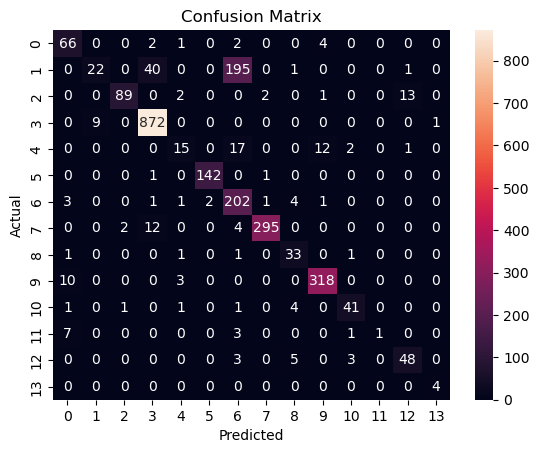

In [106]:
cnf_matrix_test_nb= confusion_matrix(test_results,test_nb_pred) 
sns.heatmap(cnf_matrix_test_nb,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

Let's predict test data using **Random Forest Classifier**

In [107]:
test_rf_pred= random_forest.predict(x_test_vect_td) 

In [108]:
test_rf_accuracy =(accuracy_score(test_results,test_rf_pred))*100
print("*****************************Random Forest Classifier***********************:")
print("Accuracy: ",test_rf_accuracy)
print("Classification_report:\n",classification_report(test_results,test_rf_pred)) 

print("f1: ",f1_score(test_results,test_rf_pred,average='weighted')) 
print("precision: ",precision_score(test_results,test_rf_pred,average='weighted'))
print("recall: ",recall_score(test_results,test_rf_pred,average='weighted'))

*****************************Random Forest Classifier***********************:
Accuracy:  81.96527229676401
Classification_report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        75
           1       0.76      0.05      0.09       259
           2       1.00      0.65      0.79       107
           3       0.88      1.00      0.93       882
           4       0.31      0.11      0.16        47
           5       0.96      0.99      0.98       144
           6       0.43      0.67      0.53       215
           7       0.95      0.97      0.96       313
           8       0.32      0.86      0.46        37
           9       0.93      1.00      0.96       331
          10       0.85      0.69      0.76        49
          11       0.50      0.08      0.14        12
          12       1.00      0.86      0.93        59
          13       1.00      0.75      0.86         4

    accuracy                           0.82      2534
   

In [109]:
print("Confusion_matrix:\n",confusion_matrix(test_results,test_rf_pred,labels=random_forest.classes_)) 


Confusion_matrix:
 [[ 64   0   0   2   1   0   1   1   2   4   0   0   0   0]
 [  0  13   0  48   0   0 172   1  25   0   0   0   0   0]
 [  0   0  70  15   9   5   0   0   1   1   6   0   0   0]
 [  0   0   0 881   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0  19   5   1   1   0   2  19   0   0   0   0]
 [  0   0   0   1   0 143   0   0   0   0   0   0   0   0]
 [  0   3   0  28   0   0 145  13  25   0   0   1   0   0]
 [  0   0   0   7   1   0   0 305   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0  32   1   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0 330   0   0   0   0]
 [  0   1   0   0   0   0   7   0   7   0  34   0   0   0]
 [  6   0   0   1   0   0   3   0   1   0   0   1   0   0]
 [  0   0   0   2   0   0   0   0   5   1   0   0  51   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   3]]


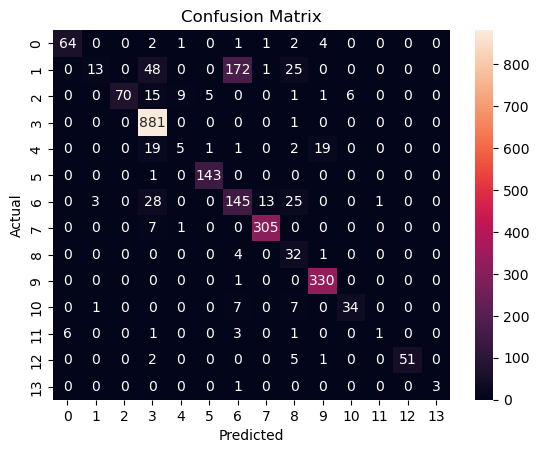

In [110]:
cnf_matrix_test_rf= confusion_matrix(test_results,test_rf_pred) 
sns.heatmap(cnf_matrix_test_rf,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

Let's predict test data using **XGBoost Classifier**

In [111]:
test_xgb_pred= xgb.predict(x_test_vect_td) 

In [112]:
test_xgb_accuracy =(accuracy_score(test_results,test_xgb_pred))*100
print("***************************** XGBoost Classifier***********************:")
print("Accuracy: ",test_xgb_accuracy)
print("Classification_report:\n",classification_report(test_results,test_xgb_pred)) 

print("f1: ",f1_score(test_results,test_xgb_pred,average='weighted')) 
print("precision: ",precision_score(test_results,test_xgb_pred,average='weighted'))
print("recall: ",recall_score(test_results,test_xgb_pred,average='weighted'))

***************************** XGBoost Classifier***********************:
Accuracy:  84.13575374901342
Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        75
           1       0.55      0.07      0.12       259
           2       1.00      0.79      0.89       107
           3       0.94      0.99      0.96       882
           4       0.94      0.96      0.95        47
           5       0.95      0.99      0.97       144
           6       0.42      0.71      0.53       215
           7       0.91      0.98      0.94       313
           8       0.42      0.78      0.55        37
           9       0.98      0.98      0.98       331
          10       0.69      0.78      0.73        49
          11       0.50      0.08      0.14        12
          12       0.96      0.83      0.89        59
          13       0.75      0.75      0.75         4

    accuracy                           0.84      2534
   macro

In [113]:
print("Confusion_matrix:\n",confusion_matrix(test_results,test_xgb_pred,labels=xgb.classes_)) 


Confusion_matrix:
 [[ 70   0   0   2   1   0   0   0   1   1   0   0   0   0]
 [  0  18   0  39   0   0 194   0   3   0   3   1   0   1]
 [  0   0  85   7   0   5   0   1   0   2   7   0   0   0]
 [  0   8   0 870   0   0   1   0   3   0   0   0   0   0]
 [  0   0   0   0  45   0   0   0   1   1   0   0   0   0]
 [  0   0   0   1   0 143   0   0   0   0   0   0   0   0]
 [  1   5   0   5   0   0 152  28  20   0   3   0   1   0]
 [  0   0   0   3   0   3   0 306   1   0   0   0   0   0]
 [  0   0   0   2   0   0   4   0  29   1   1   0   0   0]
 [  5   0   0   0   1   0   0   1   0 323   1   0   0   0]
 [  0   2   0   0   0   0   2   0   6   0  38   0   1   0]
 [  6   0   0   1   0   0   4   0   0   0   0   1   0   0]
 [  1   0   0   0   1   0   1   0   5   1   1   0  49   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   3]]


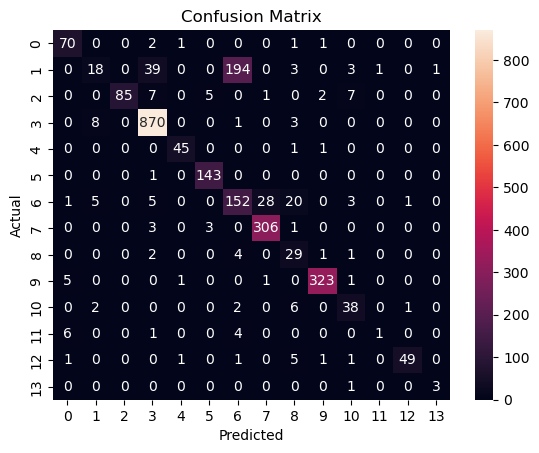

In [114]:
cnf_matrix_test_xgb= confusion_matrix(test_results,test_xgb_pred) 
sns.heatmap(cnf_matrix_test_xgb,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

#  MultiClass Text Classifier Models(DL approach)

## LSTM model

In [115]:
#storing feature and target columns
texts= preprocessed_data.description
labels= preprocessed_data.encoded_category

### train-test split

In [116]:
texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [117]:
max_words=10000
max_len =100

In [118]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts_train)

In [119]:
texts_train_seq = tokenizer.texts_to_sequences(texts_train)
texts_val_seq = tokenizer.texts_to_sequences(texts_val) 
# Applying tokenizer on test data
X_test_seq = tokenizer.texts_to_sequences(x_data) 

In [120]:
texts_train_pad = pad_sequences(texts_train_seq, maxlen=max_len, padding='post')
texts_val_pad = pad_sequences(texts_val_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [121]:
texts_train_pad.shape
texts_val_pad.shape
X_test_pad.shape

(2534, 100)

In [122]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim= max_words , output_dim=128, input_length= max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │             910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,062 (5.59 MB)

 Trainable params: 1,466,062 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
history = model.fit(texts_train_pad, labels_train, validation_data=(texts_val_pad, labels_val), epochs=15, batch_size=32)


Epoch 1/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.3187 - loss: 2.2258 - val_accuracy: 0.4142 - val_loss: 1.5587
Epoch 2/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 80s 124ms/step - accuracy: 0.4148 - loss: 1.5957 - val_accuracy: 0.4837 - val_loss: 1.3023
Epoch 3/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.4946 - loss: 1.3205 - val_accuracy: 0.5270 - val_loss: 1.1391
Epoch 4/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.6174 - loss: 1.0618 - val_accuracy: 0.7521 - val_loss: 0.6534
Epoch 5/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 83s 128ms/step - accuracy: 0.7366 - loss: 0.7166 - val_accuracy: 0.7491 - val_loss: 0.6834
Epoch 6/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.7462 - loss: 0.6969 - val_accuracy: 0.8011 - val_loss: 0.5545
Epoch 7/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 47s 143ms/step - accuracy: 0.7830 - loss: 0.5502 - val_accuracy: 0.8246 - val_loss: 0.4937
Epoch 8/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 83s 145ms/step - accuracy: 0.7925 - loss: 0

In [124]:
predictions = model.predict(X_test_pad)

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step


In [125]:
predicted_labels = np.argmax(predictions, axis=1)


In [126]:
test_lstm_accuracy =(accuracy_score(test_results,predicted_labels))*100
print("***************************** LSTM ***********************:")
print("Accuracy: ",test_lstm_accuracy)
print("Classification_report:\n",classification_report(test_results,predicted_labels)) 

print("f1: ",f1_score(test_results,predicted_labels,average='weighted')) 
print("precision: ",precision_score(test_results,predicted_labels,average='weighted'))
print("recall: ",recall_score(test_results,predicted_labels,average='weighted'))

***************************** LSTM ***********************:
Accuracy:  76.51933701657458
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73        75
           1       0.15      0.05      0.08       259
           2       0.71      0.65      0.68       107
           3       0.96      0.96      0.96       882
           4       0.22      0.21      0.22        47
           5       0.97      0.99      0.98       144
           6       0.39      0.69      0.50       215
           7       1.00      0.90      0.95       313
           8       0.30      0.81      0.43        37
           9       0.83      0.90      0.86       331
          10       0.45      0.51      0.48        49
          11       0.20      0.08      0.12        12
          12       0.68      0.36      0.47        59
          13       1.00      0.75      0.86         4

    accuracy                           0.77      2534
   macro avg       0.

In [127]:
print("Confusion_matrix:\n",confusion_matrix(test_results,predicted_labels)) 


Confusion_matrix:
 [[ 44   0   0   0   2   0   8   0  11  10   0   0   0   0]
 [  0  13   5  31   0   0 169   0   2  37   0   1   1   0]
 [  0  15  70   1   1   3   6   0   5   1   2   0   3   0]
 [  0  28   0 851   0   0   1   0   2   0   0   0   0   0]
 [  0   0   0   0  10   0  24   0   0   5   8   0   0   0]
 [  0   0   0   1   0 143   0   0   0   0   0   0   0   0]
 [  0  28  11   0   0   0 149   0  22   3   2   0   0   0]
 [  0   0   9   6   0   2   3 282   9   1   0   0   1   0]
 [  0   0   0   0   1   0   3   0  30   0   1   0   2   0]
 [  1   0   0   0  30   0   3   0   0 297   0   0   0   0]
 [  1   0   0   0   0   0  12   0   5   0  25   3   3   0]
 [  0   0   0   0   0   0   1   1   8   1   0   1   0   0]
 [  0   0   3   0   2   0   7   0   6   2  18   0  21   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   3]]


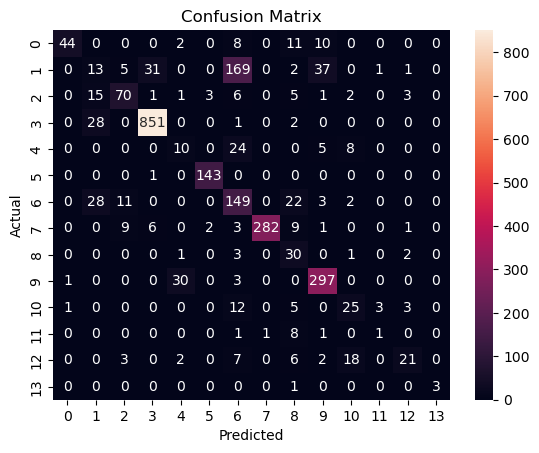

In [128]:
cnf_matrix_test_lstm= confusion_matrix(test_results,predicted_labels) 
sns.heatmap(cnf_matrix_test_lstm,annot=True,fmt='d',cmap=None) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## Visualizing the models performance on test data using Accuracy

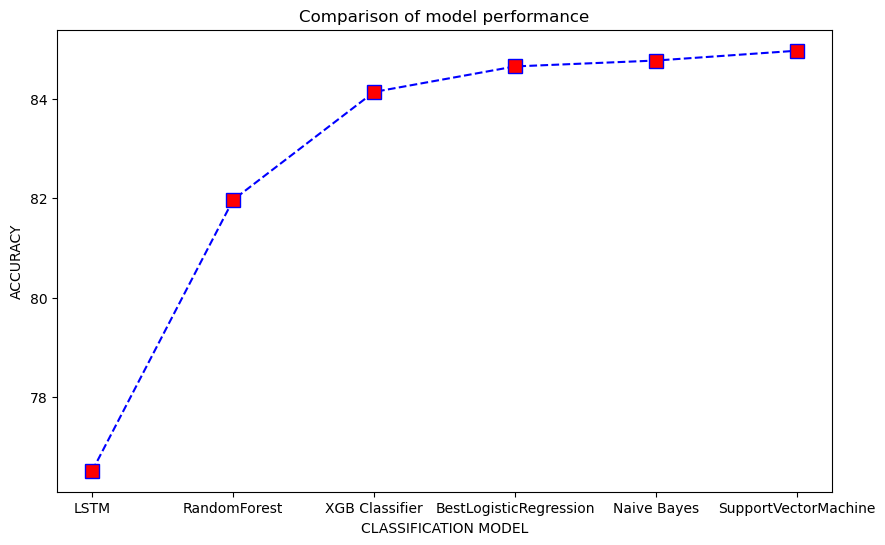

In [129]:
model_name = ['LSTM','RandomForest','XGB Classifier','BestLogisticRegression','Naive Bayes','SupportVectorMachine']
model_accuracy =[test_lstm_accuracy,test_rf_accuracy,test_xgb_accuracy,test_lr_accuracy,test_nb_accuracy,test_svm_accuracy]

plt.figure(figsize=(10,6))
plt.plot(model_name, model_accuracy, linestyle='dashed', marker='s', color='blue', markerfacecolor='red', ms='10')
plt.xlabel("CLASSIFICATION MODEL")
plt.ylabel("ACCURACY")
plt.title("Comparison of model performance")
plt.show()

## Conclusion

This project tackled the critical task of eCommerce product categorization, which plays a vital role in enhancing customer experience and streamlining product search. A variety of machine learning and deep learning models were implemented, evaluated, and compared to achieve accurate multi-class text classification.
### Key outcomes
**Model Performance:**
- The XGBoost Classifier, Hyperparameter tuned Logistic Regression model, Multinomial Naive Bayes and Support Vector Machine outperformed other approaches,delivering high accuracy of **0.84** and showcasing their ability to handle structured text classification effectively.
- While the LSTM model was explored for its potential to capture sequential dependencies in textual data, it exhibited the lowest accuracy, indicating a need for more data and tuning.
    
**Evaluation Metrics:**
- The confusion matrix provided actionable insights into misclassifications, helping identify areas where specific categories were harder to predict.
- Accuracy comparisons across models demonstrated the strengths of traditional machine learning approaches for this dataset.
